## Mobility of a sedimenting lattice as a function of volume fraction

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import solvePeriodic
#import testG3s3s as test
from math import *
PI = 3.14159265359

In [2]:
#Parameters
Np=1
b, eta, dim = 1.0, 1.0, 3
ta =(4*np.pi/3)**(1.0/3) 
L = ta/np.asarray([0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7663094323935531, 0.8059966052641452])

# Memory allocation
v = np.zeros(dim*Np)      
o = np.zeros(dim*Np)  
r = np.zeros(dim*Np)        
F = np.zeros(dim*Np)
T = np.zeros(dim*Np)  
vv  = np.zeros(np.size(L))
phi = np.zeros(np.size(L) )

S = np.zeros(Np*5)
D = np.zeros(Np*3)

mu=1.0/(6*np.pi*eta*b)

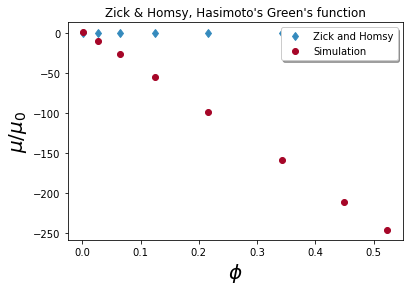

volume fraction   simulation	 Zick & Homsy (1982)
0.001		  1.517		 0.825	
0.027		  -9.024		 0.498	
0.064		  -26.028		 0.356	
0.125		  -54.712		 0.233	
0.216		  -98.006		 0.134	
0.343		  -158.834		 0.065	
0.450		  -210.268		 0.036	
0.524		  -245.708		 0.024	


In [3]:
phi = (4*np.pi*b**3)/(3*L**3)


for i in range(np.size(L)):
    v = v*0
    F = F*0

    F[2] = -1  ## gravity                           
    
    Rbm = solvePeriodic.Rbm(b, eta, L[i])   
    Rbm.krylovSolve(v, o, F, T, S, D)

    mu00 = mu*F[2]
    vv[i] = v[2]/mu00
    

exR = [.825, .498, .356, .233, .134, .065, 0.036, 0.024]
plt.title('Zick & Homsy, Hasimoto\'s Green\'s function')
plt.plot(phi, exR, 'd', color="#348ABD", label='Zick and Homsy')
plt.plot(phi, vv, 'o', color="#A60628", label='Simulation')

plt.xlabel(r'$\phi$', fontsize=20); plt.ylabel(r'$\mu/\mu_0$', fontsize=20)
plt.legend(loc='upper right', shadow=True)
plt.show()

print ('volume fraction   simulation\t Zick & Homsy (1982)')
for i in range(np.size(L)):
    print ('%1.3f\t\t  %1.3f\t\t %1.3f\t'%(phi[i], vv[i], exR[i] ))

In [4]:
v ## why are there x and y components of velocity? Fourier modes by definition asymmetric?

array([-0.04717239, -0.04717239, 13.03524069])

In [ ]:
4 modes

volume fraction   simulation	 Zick & Homsy (1982)
0.001		  1.351		 0.825	
0.027		  0.392		 0.498	
0.064		  -0.966		 0.356	
0.125		  -4.303		 0.233	
0.216		  -9.308		 0.134	
0.343		  -16.440		 0.065	
0.450		  -22.521		 0.036	
0.524		  -26.727		 0.024	

In [ ]:
## Zick and Homsy use a large number of modes (of traction) - but still, why do more Fourier modes make it worse? 

In [ ]:
## More Fourier modes just seem to make the result worse tbh - gets more and more negative at high volume fractions. Is there some kind of 1/(volume fraction) term or so? 
## 33 Fourier modes makes result even worse: first volume fraction now very small 0.212 (against Zick & Homsy's 0.825).  Seems like it just gets more negative the more
## modes are added
## Compare 12 modes symmetric and asymmetric result.  

## FH makes results better, but still the more modes the worse the result - just becomes more negative
##Problem with that many modes -- ints are too large to convert to float -- sympy problem? 
## find a way for sympy to compute things in a way - just don't bother with that many modes.

Can reproduce Hasimoto Green's function with Beenakkers by setting $\xi\rightarrow\infty$ and not subtracting $M^2(r=0)$. How do Zick & Homsy obtain anything sensible without these steps? They don't use Ewald summation? They only use Fourier space Green's function - what about the factor of $1/(4\pi^2)$ that seems to be different between Zick & Homsy and Beenakkker? 

What about any extra terms that arise. Brady, Russel and Glendinning vs. O'Brien vs. Zick & Homsy - all work with boundary integral. Others (eg Felderhof, Smith & Van Megen, Acrivos) work with different methods. Pozrikidis is also not a great help.

O'Brien: Just says quadrupole terms cancel

Glendinning & Russel: Dodgy calculation

Brady: Dodgy calculation 



Are our factors of $1/(8\pi\eta)$ and $1/L^3$ in summing the Green's function correct? 


Need theory first, before using Ewald summation, which is all we have done so far. What about

    *backflow integral
    *extra terms such as average quadrupole

In [ ]:
volume fraction   simulation	 Zick & Homsy (1982) ## for Nm=6
0.001		  0.825		 0.825	
0.027		  0.498		 0.498	
0.064		  0.356		 0.356	
0.125		  0.236		 0.233	
0.216		  0.144		 0.134	
0.343		  0.096		 0.065	
0.450		  0.092		 0.036	
0.524		  0.100		 0.024	

In [ ]:
volume fraction   simulation	 Zick & Homsy (1982)  ## for Nm=4
0.001		  0.825		 0.825	
0.027		  0.498		 0.498	
0.064		  0.356		 0.356	
0.125		  0.236		 0.233	
0.216		  0.145		 0.134	
0.343		  0.097		 0.065	
0.450		  0.094		 0.036	
0.524		  0.102		 0.024	

In [ ]:
volume fraction   simulation	 Zick & Homsy (1982) ## superposition Nm=4 
0.001		  0.825		 0.825	
0.027		  0.499		 0.498	
0.064		  0.360		 0.356	
0.125		  0.245		 0.233	
0.216		  0.159		 0.134	
0.343		  0.110		 0.065	
0.450		  0.100		 0.036	
0.524		  0.104		 0.024	